# Climate data analysis tutorial 
## An Introduction: Plotting your first temperature map

_This tutorial is an elementary introduction to getting started with hands-on data analysis of climate models from the Sixth Coupled Model Intercomparison Project CMIP6._

_Intended users: Students with no prior experience in climate data analysis, and intoductory programming background._

_If you are already familiar with the netcdf structure of climate models' output, you can move on to the more advanced workflow with automated file loading etc. (e.g. https://xclim.readthedocs.io/en/stable/notebooks/example.html)._

### Learning objectives:
<ul> 
<li> Read CMIP data (netcdf) files </li>
<li> Understand the structure of data (spatial and temporal) </li>
<li> Plotting absolute temperature for one model (with respect to a given baseline)  </li>
<li> Calculate and plot temperature change (anomaly) </li>
<li> Additional tasks: Plot a multi-model map for a given period </li>
<li> Further ideas for exploratory data analysis </li>
</ul>


<i>Notes: This tutorial is using pre-processed and quality checked CMIP data files from the repository: 
Brunner L., M. Hauser, R. Lorenz, and U. Beyerle (2020). The ETH Zurich CMIP6 next generation archive: technical documentation. DOI: 10.5281/zenodo.3734128.</i>

_Raw data archive is available at the Earth System Grid Federation (ESGF): https://esgf-node.llnl.gov/projects/cmip6/ ._

<i>Parts of the code in this tutorial are based on a collection of different sources, which you may also find useful in  getting started with plotting climate model data: </i>

<b>Main source:</b> Software Carpentry workshop: https://carpentrieslab.github.io/python-aos-lesson/02-visualisation/index.html
and: https://carpentrieslab.github.io/python-aos-lesson/03-functions/index.html

<b>Additional useful links for visualising output from climate models:</b>
<ul>
<li><a> https://nordicesmhub.github.io/climate-data-tutorial/03-visualization-python/ </a></li>
<li><a>https://github.com/hdrake/cmip6-temperature-demo/blob/master/notebooks/00_calculate_simulated_global_warming.ipynb </a></li>
<li><a>https://github.com/hdrake/cmip6-temperature-demo</a></li>
<li><a>https://xarray-test.readthedocs.io/en/latest/plotting.html</a></li>
<li><a>https://www.bookstack.cn/read/xarray-v0.12.3/213e3e31ef58c5df.md#plotting</a></li>
</ul>

_It is always a good idea to google the error or question you have. There is a lot of Python support for climate data and CMIP models output already online._

## 1.1 Import required packages and load data files

In [1]:
## Note: if working in a google collab notebook, all packages are already installed (and you can omit this cell)

# If working on a local machine or using a local Python environment:
# Install packages (in bash/ Terminal), using conda, for example
# conda install xarray
# conda install cartopy
# conda install matplotlib
# conda install numpy
## More info/help: https://carpentrieslab.github.io/python-aos-lesson/01-conda/index.html

In [1]:
# Now, import required packages for reading netcdf data and plotting
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [3]:
# Change to the working directory to where the files are located

# Other useful commands:
# ! and % => allows for using bash/unix commands directly in Python/jupyter notebook
# pwd => shows your current directory
# cd => changes directory to a specified one
# ls => lists files in a current directory
#%cd '/Users/ktokarska/Desktop/ssp119_ng'
%cd /Users/ktokarska/Dropbox/kasia_share/ssp119_ng
!pwd

/Users/ktokarska/Dropbox/kasia_share/ssp119_ng
/Users/ktokarska/Dropbox/kasia_share/ssp119_ng


In [3]:
#list files in that directory
ls

global_tas_ann_CAMS-CSM1-0_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_EC-Earth3-Veg_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_EC-Earth3_hist_ssp119_r4i1p1f1_g025.nc
global_tas_ann_GFDL-ESM4_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_IPSL-CM6A-LR_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_MIROC-ES2L_hist_ssp119_r1i1p1f2_g025.nc
global_tas_ann_MIROC6_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_MRI-ESM2-0_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_UKESM1-0-LL_hist_ssp119_r1i1p1f2_g025.nc
tas_ann_CAMS-CSM1-0_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_EC-Earth3-Veg_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_EC-Earth3_hist_ssp119_r4i1p1f1_g025.nc
tas_ann_GFDL-ESM4_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_IPSL-CM6A-LR_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_MIROC-ES2L_hist_ssp119_r1i1p1f2_g025.nc
tas_ann_MIROC6_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_MRI-ESM2-0_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_UKESM1-0-LL_his

## 1.2 Understanding the file names
Here, we will be using the annual mean files, where the model name is specified after the "tas_ann_" (e.g. CanESM5 model in this case), and the scenario is historical followed by SSP1-19. 
All data files here are already re-gridded onto a common grid (2.5x2.5 degrees) for all models.

An example of understanding each part of this file name: 
'tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc'
<ul> 
<li> tas => surface air temperature </li>
<li> ann => annual means (i.e., each point in time is a given year) </li>
<li> CanESM5 => name of the climate model (in this case CanESM5) </li>
<li> hist_ssp119 => name of the scenario (in this case historical + ssp119) </li>
<li> r1ip1f1 => first number indicates ensemble member (different numbers would mean different initial conditions); p number indicates physics-mode and should be the same "1" for each model in this case; f number can be "1" or "2" </li>
<li> g025 => indicates that the file was re-gridded onto a common 2.5 x 2.5 degree grid </li>
<li> .nc => indicates netcdf file format </li>
</ul> 

## 1.3 Additional notes regarding scenarios
The SSP 1.19 scenario is an ambitous mitigation scenario that contains a large amount of carbon dioxide removal from the atmosphere and aims to keep the global mean temperature at a level consistent with the Paris Agreement target. 

More information about CMIP6 scenarios can be found here: 
_Meinshausen, M., et al.: Historical greenhouse gas concentrations for climate modelling (CMIP6), Geosci. Model Dev., 10, 2057–2116, https://doi.org/10.5194/gmd-10-2057-2017, 2017._ 

And an easy explainer is here: https://www.carbonbrief.org/cmip6-the-next-generation-of-climate-models-explained

## 1.4 Load data and check its contents

In [4]:
#Specify file name to be loaded (e.g. containing data for one model: 'CanESM5') 
tas_file_name = 'tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc'

In [5]:
#load the file into xArray data structure
dset = xr.open_dataset(tas_file_name)

In [6]:
#View the temperature variable
#print(dset['tas'])
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 72, lon: 144, time: 251)
Coordinates:
  * time       (time) object 1850-07-01 06:00:00 ... 2100-07-01 06:00:00
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat        (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    tas        (time, lat, lon) float64 ...
    file_qf    float64 ...
Attributes:
    CDI:                         Climate Data Interface version 1.9.6 (http:/...
    history:                     Sat Feb 29 10:41:32 2020: ncrcat tas_ann_Can...
    source:                      CanESM5 (2019): \naerosol: interactive\natmo...
    institution:                 Canadian Centre for Climate Modelling and An...
    Conventions:                 CF-1.7 CMIP-6.2
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-

In [7]:
#check units
dset.tas.attrs['units']

'K'

In [8]:
#convert units to Celcius
dset.tas.data = dset.tas.data - 273.15
dset.tas.attrs['units'] = 'Celcius' 
#Note: this step is not needed if plotting anomalies (since it's a relative change)

In [9]:
#display years in this file
print(dset.tas.time)

<xarray.DataArray 'time' (time: 251)>
array([cftime.DatetimeNoLeap(1850, 7, 1, 6, 0, 0, 0, 1, 182),
       cftime.DatetimeNoLeap(1851, 7, 1, 6, 0, 0, 0, 2, 182),
       cftime.DatetimeNoLeap(1852, 7, 1, 6, 0, 0, 0, 3, 182), ...,
       cftime.DatetimeNoLeap(2098, 7, 1, 6, 0, 0, 0, 4, 182),
       cftime.DatetimeNoLeap(2099, 7, 1, 6, 0, 0, 0, 5, 182),
       cftime.DatetimeNoLeap(2100, 7, 1, 6, 0, 0, 0, 6, 182)], dtype=object)
Coordinates:
  * time     (time) object 1850-07-01 06:00:00 ... 2100-07-01 06:00:00
    height   float64 ...
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T


## 2.1. Plotting absolute temperature for one model

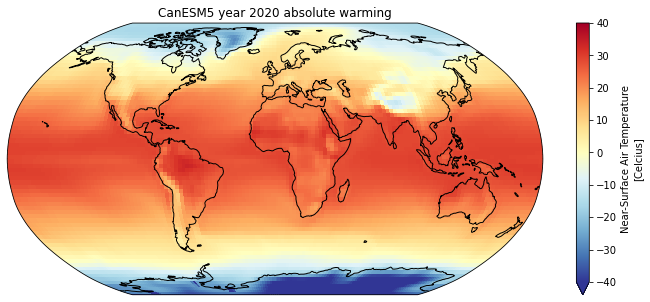

In [49]:
#plot a map of warming in a given year (e.g., in the year 2020-07-01)

#choose map projection: eg. robinson projection 

#map centered on Europe and Africa
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree(central_longitude=0) # define origin coordinate frame

#prepare the figure
plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-40, vmax=40)

#plot
q = dset['tas'].sel(time='2020-07-01').plot(ax=ax, cmap='RdYlBu_r', norm=norm, transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s year 2020 absolute warming' %(dset.attrs['parent_source_id'])
plt.title(title)

plt.show()

#save figure
# plt.savefig("test.pdf")

### Choose a different color map
See the following links for different color map options:
https://matplotlib.org/tutorials/colors/colormaps.html

_Tip: If you would like to flip the colours (upside-down color map), add _r at the end of the name of the colormap (i.e., cmap='RdYlBu_r' instead of cmap='RdYlBu')_

To choose different scale on the color bar:
https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

## 2.2. Calculate and plot temperature change (anomaly)

### 2.2.2. Plotting end-of-the century warming with respect to the pre-industrial (1850-1900) period

In [11]:
#Calculate temperature change (anomaly): mean over 2100-2080 period minus mean over 1850-1950 period
temperature_change = (
    dset['tas'].sel(time=slice('2080-07-01','2100-07-01')).mean(dim='time') -
    dset['tas'].sel(time=slice('1850-07-01','1950-07-01')).mean(dim='time')
).compute()

Text(0.5, 1.0, 'CanESM5 anomaly 2100-2080 wrt 1850-1900')

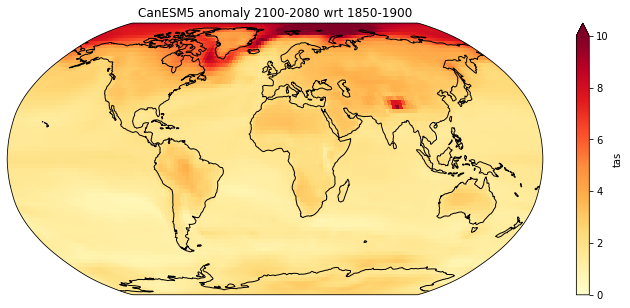

In [46]:
#plotting the anomaly map

#choose projection: eg. robinson projection
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=0, vmax=10)

q = temperature_change.plot(ax=ax, cmap='YlOrRd',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s anomaly 2100-2080 wrt 1850-1900' %(dset.attrs['parent_source_id'])
plt.title(title)

#save figure
# plt.savefig("test.pdf")

### 2.2.3. Plotting end-of-the century warming with respect to the present-day (years 2000 to 2020 reference)

In [13]:
#Calculate temperature change (anomaly) for another period: mean over 2100-2080 minus mean over 1850-1950
temperature_change_2100_2080_wrt_2020_200 = (
    dset['tas'].sel(time=slice('2080-07-01','2100-07-01')).mean(dim='time') -
    dset['tas'].sel(time=slice('2000-07-01','2020-07-01')).mean(dim='time')
).compute()

Text(0.5, 1.0, 'CanESM5 anomaly 2100-2080 wrt 2020-2000')

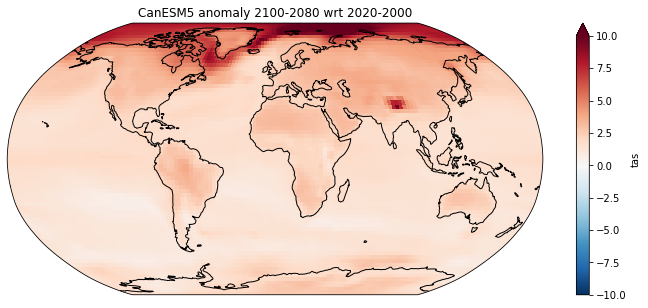

In [41]:
import matplotlib as mpl
#choose projection: eg. robinson projection 
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

#initialize figure
fig, ax = plt.subplots(figsize=(12,5), 
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-10, vmax=10)

q = temperature_change.plot(ax=ax, cmap='RdBu_r',norm=norm, transform = geo) # plot a colormap in transformed coordinates

#add coastlines
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = '%s anomaly 2100-2080 wrt 2020-2000' %(dset.attrs['parent_source_id'])
plt.title(title)

#save figure
# plt.savefig("test.pdf")

## Next possible steps for exploratory data analysis:

<ul> 
<li> Plot anomalies for different decades, and with respect to different time series  </li>
<li> Add more models, and plot maps for each model, to see how the responses differ among models  </li>
<li> Calculate a multi-model mean map (i.e., mean of temperature changes in all models for a given period)  </li>
<li> Calculate a multi-model mean based on top two or three warmest models. </li>
<li> Calculate a multi-model mean based on top two or three coldest models. Hint: (Use the global mean time-series to determine which models are warmest/coldest, based on the global mean response)</li>
<li> Select top two warmest and top two coldest models. Compare how warming patterns change among them </li>
<li> Subtract global mean for equivalent time periods, to see which regions warm or cool more than the global mean temperature change  </li>

_Note: Due to the noise from internal variability ("the wiggles in the time-series"), we usually use the average over 10 or 20 year periods, rather than a single year._